Populating the interactive namespace from numpy and matplotlib
Cu_orbs =  ['d3z2r2', 'dx2y2', 'dxy', 'dxz', 'dyz']
O1_orbs =  ['px']
O2_orbs =  ['py']
symmetries =  ['ALL']
E_1S =  12.66
E_1G =  8.26
E_1D =  7.21
E_3P =  7.55
E_3F =  5.3


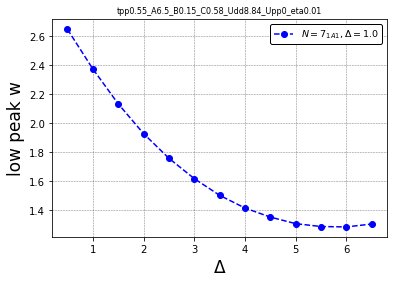

In [1]:
# Supplemental program for 1A1_lowest_peak_dispersion.ipynb
# to compare the Aw and w position for the lowest peak in 1A1 channel
# for 3-, 7-orbital models

%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *

import parameters as pam
import lattice as lat
import variational_space as vs
import hamiltonian as ham
import basis_change as basis
import lanczos

ed = 0
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

Npts = 9

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0
eta = 0.01

Norb7 = 7
Mc7 = 10

f1A1 = 'Norb7_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_Mc'+str(Mc7)+'_eta'+str(eta)+'_1A1.txt'
f3B1 = 'Norb7_tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_Mc'+str(Mc7)+'_eta'+str(eta)+'_3B1.txt'
titlename = 'tpp'+str(tpp)+'_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Udd'+str(Udd)+'_Upp'+str(Upp)+'_eta'+str(eta)
    
##########################################################################
# E of lowest peak
##########################################################################
Ms = ['-b','-r','-g','-m','-c','-k','-y','--b','--r','--g','--m','--c','--k','--y']
# a[1,0]-tpp*4 is the bottom of p-band
# when (a[:,0]-tpp*4)-a[:,2] less than 0, peak within continuum; larger than 0, discrete state
a = loadtxt('./data_lowpeak/'+f1A1,skiprows=0)
plot(a[:,0], (a[:,0]-tpp*4)-a[:,2], '--bo', label="$N=7_{1A1}, \Delta=$"+str(a[1,0]))
#a = loadtxt('./data_lowpeak/'+f3B1,skiprows=0)
#plot(a[:,1], (a[:,0]-tpp*4)-a[:,2], '--rs', label="$N=7_{3B1}, \Delta=$"+str(a[1,0]))

title(titlename, fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
xlabel('$\Delta$',fontsize=17)
ylabel('low peak w',fontsize=17)
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("w_lowpeak_"+titlename+".pdf")

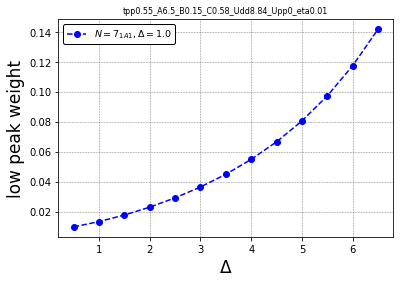

In [2]:
##########################################################################
# weight of lowest peak
##########################################################################
#clf()
# a[1,0]-tpp*4 is the bottom of p-band
a = loadtxt('./data_lowpeak/'+f1A1,skiprows=0)
plot(a[:,0], a[:,3], '--bo', label="$N=7_{1A1}, \Delta=$"+str(a[1,0]))
#a = loadtxt('./data_lowpeak/'+f3B1,skiprows=0)
#plot(a[:,1], a[:,3], '--rs', label="$N=7_{3B1}, \Delta=$"+str(a[1,0]))

title(titlename, fontsize=8)
xlabel('$t_{pd}$',fontsize=17)
xlabel('$\Delta$',fontsize=17)
ylabel('low peak weight',fontsize=17)
#text(0.45, 0.1, '(a)', fontsize=16)
grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
legend(loc='best', fontsize=9.5, framealpha=1.0, edgecolor='black')
savefig("weight_lowpeak_"+titlename+".pdf")